# PJM Hourly Energy Consumption Case

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

### Exploratory Data Analysis Step - By Sabrina Otoni da Silva - 2024/04

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datapath = Path('../data/d02_intermediate')

In [3]:
df = pd.read_csv(f'{datapath}/pjme_n00.csv')
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df.head()

,pjme_mw
datetime,
2002-01-01 01:00:00,30393
2002-01-01 02:00:00,29265
2002-01-01 03:00:00,28357
2002-01-01 04:00:00,27899
2002-01-01 05:00:00,28057


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   pjme_mw  145366 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB


In [5]:
df.describe()

,pjme_mw
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


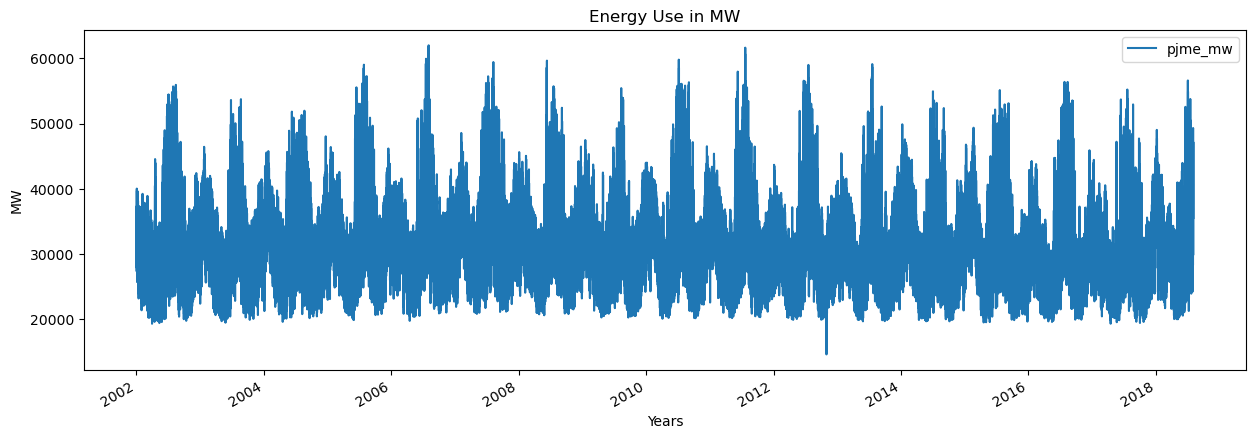

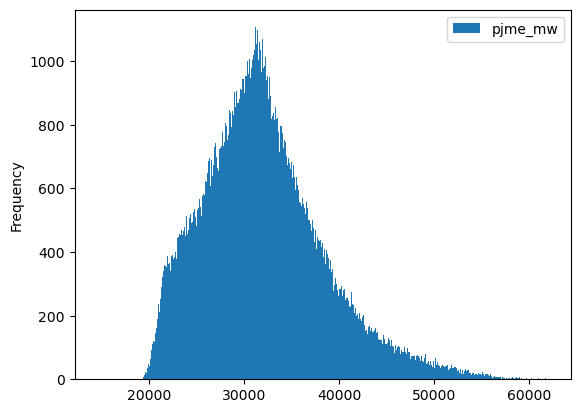

In [6]:
df.plot(figsize=(15, 5), title='Energy Use in MW')
plt.xlabel('Years')
plt.ylabel('MW')
plt.show()

df.plot(kind='hist', bins=500)
plt.show()

In [7]:
df.loc[df['pjme_mw'] < 20000].count()

pjme_mw    188
dtype: int64

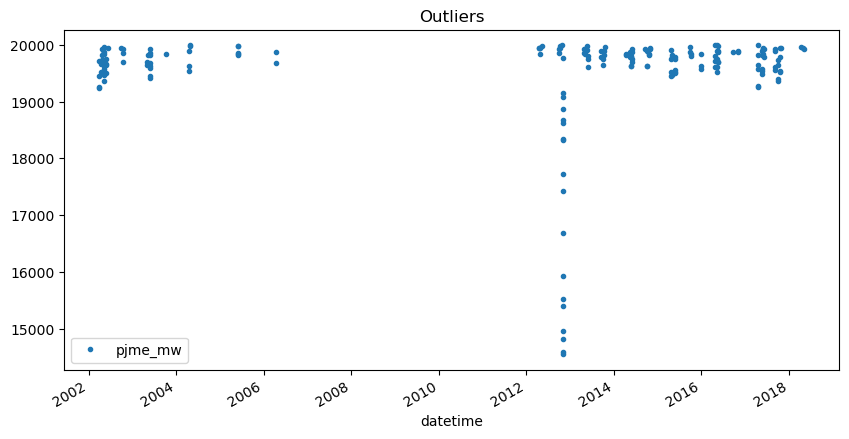

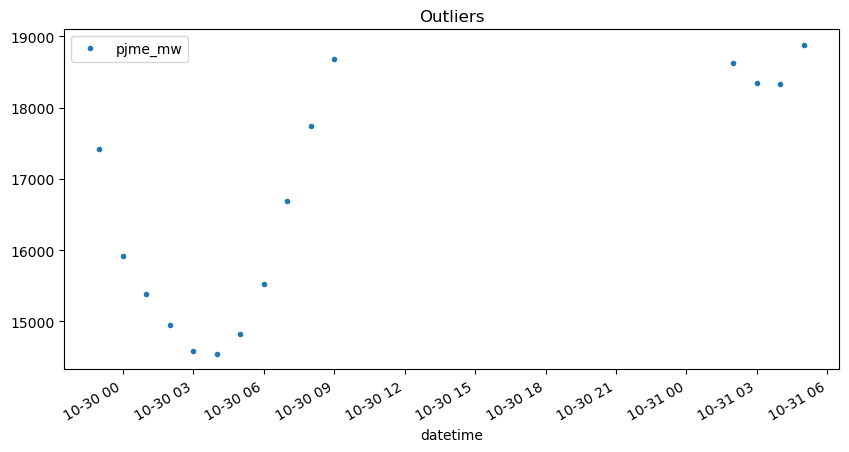

In [8]:
df.loc[df['pjme_mw'] < 20000].plot(style='.', figsize=(10, 5), title='Outliers');
df.loc[df['pjme_mw'] < 19000].plot(style='.', figsize=(10, 5), title='Outliers');

In [9]:
df = df.loc[df['pjme_mw'] > 19000].copy()

In [9]:
intermediate_path = Path('../data/d02_intermediate')
df.to_csv(f'{intermediate_path}/pjme_n01.csv')